In [5]:
# download data sets from github
import os, sys, tarfile, urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" 
HOUSING_PATH = os.path.join("datasets", "housing") 
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data( 
    housing_url = HOUSING_URL, 
    housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True) 
    tgz_path = os.path.join(housing_path, "housing.tgz") 
    urllib.request.urlretrieve(housing_url, tgz_path) 
    housing_tgz = tarfile.open(tgz_path) 
    housing_tgz.extractall(path=housing_path) 
    housing_tgz.close()

# fetch_housing_data()


In [7]:
# return a pandas dataframe containing all of the housing data
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv") 
    return pd.read_csv(csv_path)

housing = load_housing_data()  # load the dataset as dataframe into housing var
housing.head()  # use head method to display top 5 rows of data set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()  # get quick description of data
# note that 207 districts are missing the total_bedrooms attribute
# note that ocean_proximity is the only non-numerical value in the set (it's text)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# ocean_proximity looks like a category field
# so, see how many categories are in the data set and
# count how many districts belong to each category
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# get a summary of the numerical attributes
# std is standard deviation, which measures how dispersed the values are
# the % quartiles show the % of values below the cut point indicated for each field
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


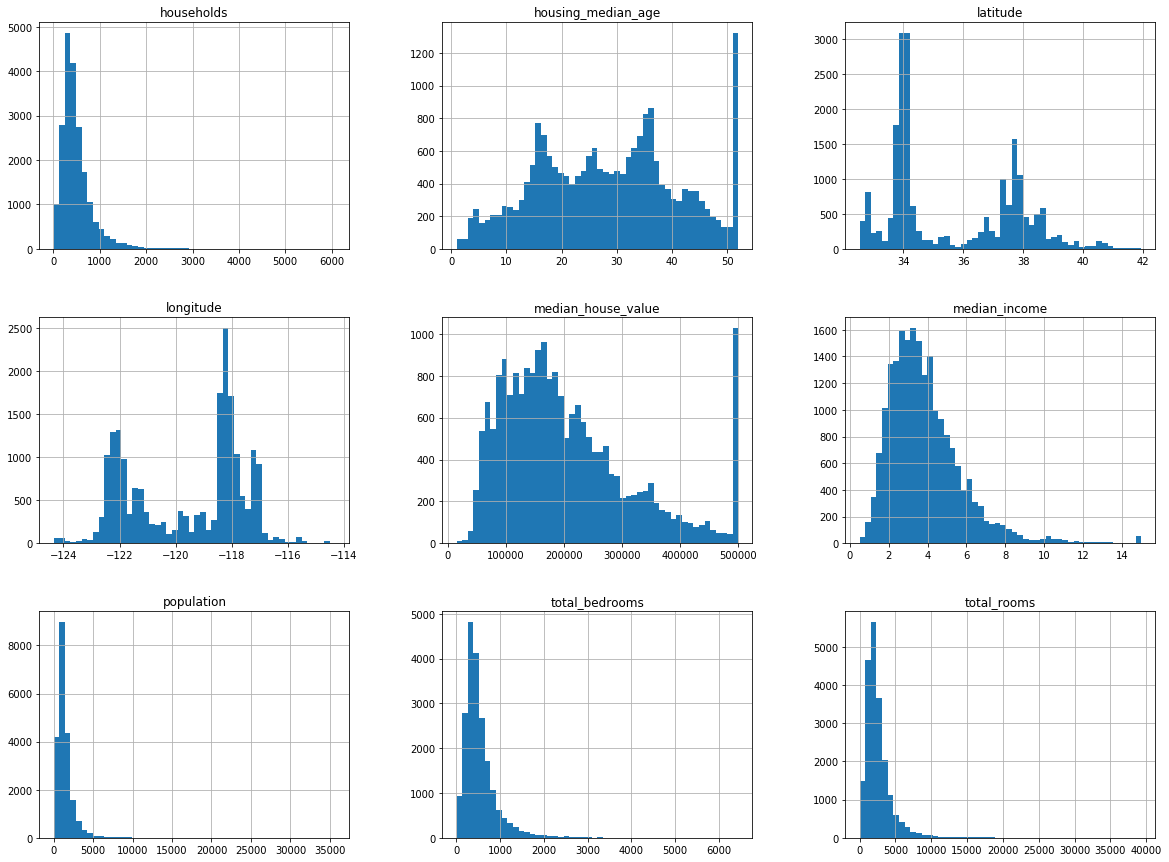

In [13]:
# plot a histogram for each numerical attribute
%matplotlib inline 
# matplotlib relies a user-specified graphical backend to draw on the screen;
# rem: %matplotlib inline is a Jupyter magic command
# which tells Jupyter to set up Matplotlib so that it uses
# Jupyter's own backend, which will render plots in the notebook itself
import matplotlib.pyplot as plt 
housing.hist( bins = 50, figsize =( 20,15)) 
plt.show()

In [14]:
# median_income is represented in 1$ = $10k, so 3 = $30,000
# rem such preprocessed attributes in common in ML, so this isn't a problem,
# but it is nice to understand how the data was computed

In [ ]:
# if the histogram is tail heavy, that means the data stretches further to the right
# of the median than to the left, which may make it harder for some ML algorithms
# to detect patterns... if needed, you can try to transform these attributes to have
# more bell-shaped distributions

In [16]:
# create a test set
import numpy as np

def split_train_test(data, test_ratio): 
    shuffled_indices = np.random.permutation(len( data)) 
    test_set_size = int(len( data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]


In [17]:
train_set, test_set = split_train_test(housing, 0.2)

In [18]:
len(train_set)

16512

In [19]:
len(test_set)

4128

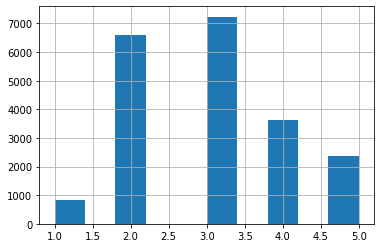

In [24]:
# create buckets for median_income to make sure you can include 
# a sample in your test set that is representative of the entire population
# of data for this category
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels = [1, 2, 3, 4, 5])
housing['income_cat'].hist()

In [25]:
# after you get income categories per above paragraph,
# you are ready to do stratified sampling on it
# for this, you can use Scikit-Learn's StratifiedShuffleSplit class
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits = 1, 
                               test_size = 0.2, 
                               random_state = 42) 
for train_index, test_index in split.split(housing, 
                                           housing["income_cat"]): 
    strat_train_set = housing.loc[train_index] 
    strat_test_set = housing.loc[ test_index]


In [26]:
# look at the income category proportions in the test set:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)


3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [27]:
# make a copy of the training set
housing = strat_train_set.copy()

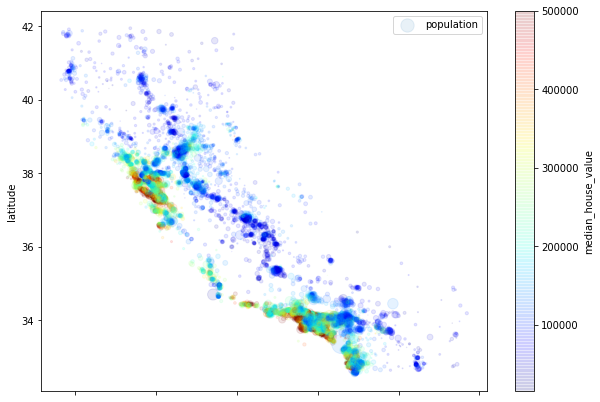

In [30]:
# create a scatter plot of all districts to visualize the data
# and set alpha option to 10% to get a view of higher density data points
# let the radius of each circle be population (option s)
# and the color represent price (option c)
# using the predefined color map (cmap) called jet, which goes from 
# low (blue) to high (red)
housing.plot(kind='scatter', 
             x='longitude', 
             y='latitude', 
             alpha=0.1,
             s = housing['population']/100,
             label='population', 
             figsize=(10,7),
             c = 'median_house_value',
             cmap=plt.get_cmap('jet'),
             colorbar=True,
            )
plt.legend()
# the resulting heat map tells you (or confirms for you) that 
# housing prices are related to location and population density

In [31]:
# you can easily compute standard correlation coefficient between every pair of attributes
# using the corr() method:
corr_matrix = housing.corr()

# and then look at how much each attribute correlates with the median house value:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC89894288>,
      dtype=object)

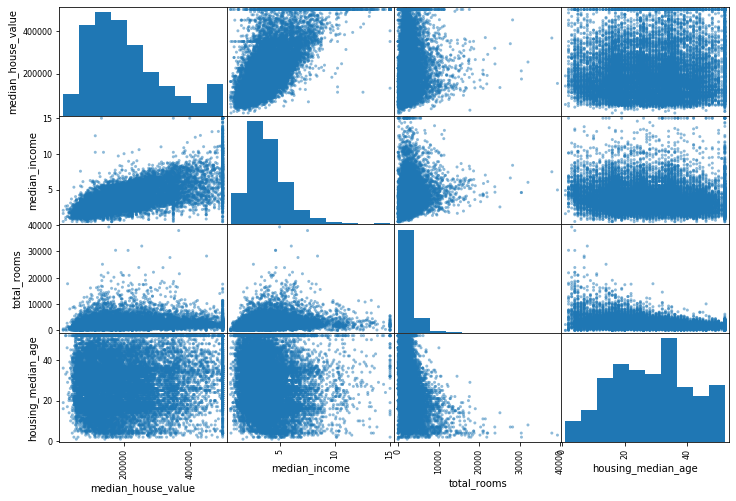

In [32]:
#another way to check for correlations between attributes is to use
# pandas scatter_matrix() function which plots every numerical attribute 
# against every other numerical attribute
# ... to make sure your plot fits on a page, choose the most promising 
# attributes that seem the most correlated with the median housing value
from pandas.plotting import scatter_matrix

attributes = [
    'median_house_value',
    'median_income',
    'total_rooms',
    'housing_median_age'
    ]
scatter_matrix(housing[attributes], figsize=(12,8))

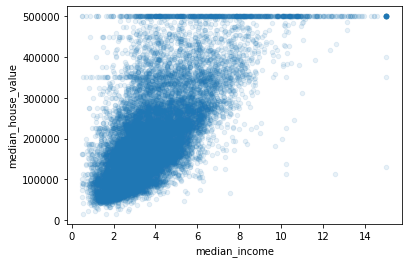

In [34]:
# median income vs median house value looks promising, so let's zoon in:
housing.plot( 
            kind ="scatter", 
            x ="median_income", 
            y ="median_house_value", 
            alpha = 0.1)


In [35]:
# look at attribute combinations that may be more useful than the current attributes in the data
housing["rooms_per_household"] = housing["total_rooms"]/ housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/ housing["total_rooms"] 
housing["population_per_household"] = housing["population"]/ housing["households"]
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [37]:
# revert to a clean training set and separate the predictors and the labels
housing = strat_train_set.drop("median_house_value", axis = 1) 
housing_labels = strat_train_set["median_house_value"].copy()


In [39]:
# scikit-learn provides a handy class to take care of missing values: SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # only works on numerical attributes
housing_num = housing.drop('ocean_proximity', axis=1)  # drop the text field bc imputer can only use numerical

# now, fit the imputer instance to the training data using the fit() method
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [40]:
# the imputer has computed median of each attribute and stored the result
# in its statistics_ instance variable
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [41]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [45]:
# replace missing values with the learned medians
x = imputer.transform(housing_num)

In [47]:
# the result is a plain NumPy array with the transformed features...
# and you can put it back into a pandas dataframe this way:
housing_tr = pd.DataFrame(x, columns = housing_num.columns, index = housing_num.index)
